<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Parcial3Dinosaurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Markov : Cadena de Producción
import numpy as np
import matplotlib.pyplot as plt

(a)

**Estado del producto en la estación de producción:**

- Avanza a la estación de empaque: Probabilidad = 90%.
- Tiene defecto y permanece en la producción: Probabilidad = 10%.


**Estado del producto en la estación de empaque:**

- Es enviado al mercado: Probabilidad = 95%.
- Permanece en la estación de empaque: Probabilidad = 5%.

In [24]:
# b)
DictS={0:'Producción',1:'Empaquetado',2:'Mercado'}

In [25]:
# c)
TM = np.array([[0.10,0.90,0.00],\
              [0.00,0.05,0.95],\
              [0.00,0.00,1.00]])

In [26]:
# d)
n = TM.shape[0]
A = np.vstack((TM.T - np.eye(n), np.ones(n)))
b = np.zeros(n + 1)
b[-1] = 1

pi = np.linalg.lstsq(A, b, rcond=None)[0]
pi

array([ 1.59731365e-16, -1.11022302e-16,  1.00000000e+00])

In [27]:
# Pi = [0, 0, 1].  La interpretación es que el producto tiende a estar en la manos del cliente el 100 % del tiempo

In [28]:
# e) P(S1 ∩ S2)
Py = pi[0]*pi[1]
Py

-1.7733743924663986e-32

In [29]:
# f) P(S1 U S2)
Po = pi[0] + pi[1]
Po

4.8709062599485396e-17

In [30]:
# g) P(S1^c)
Pv = 1 - (pi[0] + pi[1])
Pv

1.0

In [31]:
# Markov: : Cadena de Producción con devolución de producto

(a)

**Estado del producto en la estación de producción:**

- Avanza a la estación de empaque: Probabilidad = 90%
- Tiene defecto y permanece en la producción: Probabilidad = 10%


**Estado del producto en la estación de empaque:**

- Es enviado al mercado: Probabilidad = 95%
- Permanece en la estación de empaque: Probabilidad = 5%


**Estado del producto en las manos del cliente:**

- Permanece en las manos del cliente= 98%
- El producto es devuelto y va directamente a producción: 2%


In [32]:
# b)
DictS={0:'Producción',1:'Empaquetado',2:'Mercado'}

In [33]:
TMD = np.array([[0.10,0.90,0.00],\
              [0.00,0.05,0.95],\
              [0.02,0.00,0.98]])

In [34]:
# d)
n = TMD.shape[0]
A = np.vstack((TMD.T - np.eye(n), np.ones(n)))
b = np.zeros(n + 1)
b[-1] = 1

pid = np.linalg.lstsq(A, b, rcond=None)[0]
pid

array([0.02130045, 0.02017937, 0.95852018])

In [35]:
#Pid. La interpretación es que el producto tiende a estar, aproximadamente, el 2,1 % del tiempo en producción, el 2 % en empaquetado y el 95,9 % en las manos del cliente

In [36]:
# e) P(S1 ∩ S2)
Pyd = pid[0]*pid[1]
np.round(Pyd,5)

0.00043

In [37]:
# f) P(S1 U S2)
Pod = pid[0] + pid[1]
np.round(Pod,4)

0.0415

In [38]:
# g) P(S1^c)
Pvd = 1 - (pid[0] + pid[1])
np.round(Pvd,4)

0.9585

In [39]:
# Hidden Markov: Casino tramposo

# a)
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

Moneda=np.array([0,1])
Prior=np.array([0.2,0.8])
Obs=np.array([1,0,0,0,1,0,1,0])

T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

DictHidden = {0:'Justa',1:'Sesgada'}

DictObs = {0:'Cara',1:'Sello'}

def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))

    Permu = []

    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

HiddenStates=GetStates(Moneda,8)

# b)
def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.

  p *= Prior[ State[0] ]

  for i in range(n-1):
    p *= T[ State[i+1], State[i] ]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p

P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

ii = np.where( P == np.max(P) )
print(HiddenStates[ii],P[ii])

[[1 1 1 1 0 0 0 0]] [0.0001911]


In [49]:
#(c)
import pandas as pd
import numpy as np

ObsStates = GetStates([0,1],8)
Nobs = ObsStates.shape[0]
PObs = np.zeros(Nobs)

def data_20(ObsStates, PObs):
    t = 0
    for i in range(len(PObs)):
        t += PObs[i]
        if t >= 0.2:
            break

    sequences = [''.join(map(str, seq)) for seq in ObsStates[:i+1]]

    df = pd.DataFrame({
        'Secuencia': sequences,
        'Probabilidad': PObs[:i+1]
    })

    df = df.sort_values(by='Probabilidad', ascending=False)

    df['Suma'] = df['Probabilidad'].cumsum()

    return df

result_df = data_20(ObsStates, PObs)
result_df


,Secuencia,Probabilidad,Suma
0,00000000,0.0,0.0
1,00000001,0.0,0.0
162,11110000,0.0,0.0
163,00011111,0.0,0.0
164,00101111,0.0,0.0
...,...,...,...
90,11001000,0.0,0.0
91,11010000,0.0,0.0
92,11100000,0.0,0.0
93,00001111,0.0,0.0


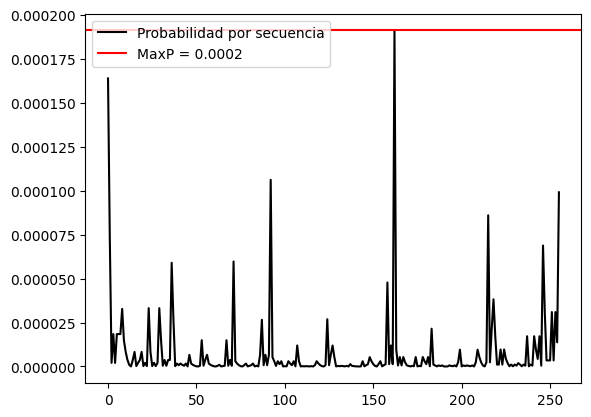

In [46]:
# d)
plt.plot(P, color='k', label= 'Probabilidad por secuencia')
plt.axhline(np.max(P), color='r', label = 'MaxP = ' + str(np.round(np.max(P),4)))
plt.legend()
plt.show()

In [47]:
# e)
ObsStates = GetStates([0,1],8)
ObsStates

Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):

  dim = HiddenStates.shape[0]
  P = np.zeros(dim)

  for i in range(dim):
    P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)

  PObs[j] = np.sum(P)

PObs

array([0.13698241, 0.04114921, 0.0347373 , 0.03175272, 0.03026766,
       0.02932288, 0.02830811, 0.02656789, 0.02297818, 0.01870516,
       0.01330002, 0.01467809, 0.01079433, 0.01067359, 0.01276253,
       0.00956961, 0.00877661, 0.00936674, 0.01172117, 0.00883478,
       0.00776184, 0.00767971, 0.00853533, 0.01088136, 0.00811519,
       0.00697382, 0.00661175, 0.00679511, 0.00764233, 0.00970066,
       0.00694603, 0.00590355, 0.00547305, 0.00537647, 0.00555143,
       0.00611094, 0.0074164 , 0.00955193, 0.00649319, 0.00616157,
       0.00733671, 0.00505945, 0.00428819, 0.00497251, 0.00456283,
       0.0048075 , 0.00623446, 0.00432462, 0.00337544, 0.00382959,
       0.00321043, 0.00330316, 0.00416108, 0.00372302, 0.00355961,
       0.00405611, 0.00553322, 0.00381405, 0.00283376, 0.00316972,
       0.00249084, 0.00251514, 0.00309313, 0.00256378, 0.00241017,
       0.0026765 , 0.00353481, 0.00309969, 0.00278698, 0.0028754 ,
       0.00342205, 0.00478004, 0.00319794, 0.00231328, 0.00256

In [48]:
# f)
np.sum(PObs)

1.0000000000000007

(g)

Sí, el resultado depende de la probabilidad a-priori porque esta representa la distribución inicial de los estados ocultos antes de observar los datos. Si se modifican las probabilidades a-priori, el cálculo de las probabilidades conjuntas y condicionales para las secuencias ocultas también cambiará, afectando las secuencias más probables. Sin embargo, su influencia disminuye a medida que se tienen más observaciones, ya que los datos observados ganan mayor peso en las estimaciones.

(h)

Si quisiera estimar las matrices de transición y emisión, un enfoque metodológico sería emplear redes neuronales, las cuales son adecuadas para modelar secuencias temporales. En este enfoque, los robots podrían ser entrenados para predecir el siguiente estado observable dado el histórico de observaciones, mientras que las probabilidades de transición y emisión se aprenderían como pesos internos de la red.



In [50]:
# Maxwell-Boltzmann distribution

#a)
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"

df = pd.read_csv(url)
df.to_csv('Maxwell.csv', index=False)

Maxwell = pd.read_csv('Maxwell.csv')
Maxwell

,Velocidad
0,547.265773
1,449.920418
2,773.814382
3,823.668389
4,352.873887
...,...
2995,601.470068
2996,508.491149
2997,594.981398
2998,376.388615


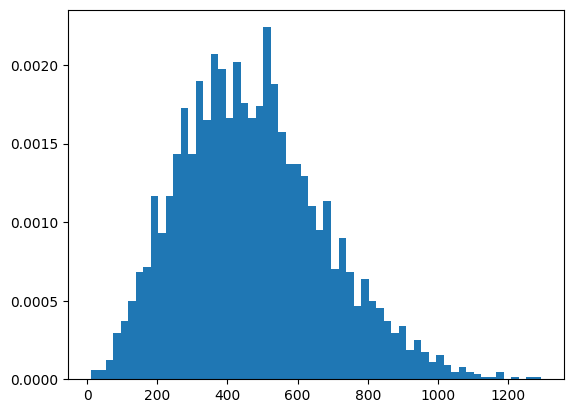

In [51]:
#b)
histograma = plt.hist(Maxwell, bins=60, density=True)

In [52]:
# c)
promedio = np.mean(histograma[0])
promedio

0.0007777147550061165

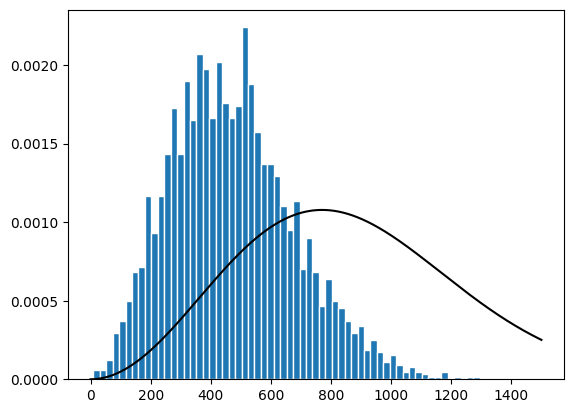

In [53]:
# d)
V = Maxwell['Velocidad']

def likelihood(T,v):
  epsilon = 1e-10  # Un valor pequeño
  result = ((0.028 / (2 * np.pi * 8.31 * T))**(3/2)) * (4 * np.pi * (v**2) * np.exp(-0.028 * v**2 / (2 * 8.31 * T)))
  return result + epsilon  # Sumar epsilon

plt.hist(V, bins=60, density=True, edgecolor='white')
x=np.linspace(0,1500,1000)
plt.plot(x,likelihood(1000,x), color='k')
plt.show()

In [54]:
# e)
def JointLikelihood(T,v):
  try:
    result = -np.sum(np.log(likelihood(T, v)))
  except ZeroDivisionError:
    result = float('inf')  # Asignar un valor grande en caso de error
  return result

p0 = 100
import scipy.optimize as spo
result = spo.minimize(JointLikelihood,p0,args=(V))
result.x

array([297.89452501])

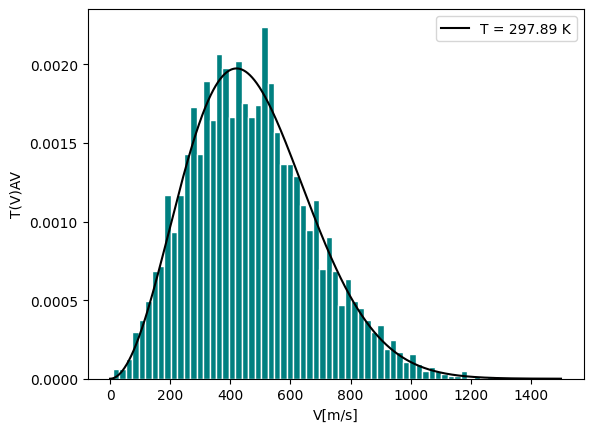

In [55]:
plt.hist(V, bins=60, density=True, color='teal', edgecolor='white')
x=np.linspace(0,1500,1000)
plt.plot(x,likelihood(result.x,x), color='k', label='T = ' + str(np.round(result.x[0],2)) +" K")
plt.xlabel('V[m/s]')
plt.ylabel('T(V)AV')
plt.legend()
plt.show()

In [56]:
# f)
vp = np.sqrt(2 * 8.31 * result.x / 0.028)
vp

array([420.5016989])

In [62]:
# g)
vm = (2/np.sqrt(np.pi)) * vp
vm


array([474.48535676])

g) La velocidad promedio difiere del promedio empírico obtenido
directamente del histograma de datos. Esta discrepancia surge porque Vm se basa
en una aproximación teórica derivada de la distribución de Maxwell-Boltzmann, la
cual considera la forma matemática exacta de cómo las velocidades se distribuyen
en un sistema en equilibrio térmico. Por otro lado, el promedio empírico refleja
directamente los valores medidos en los datos experimentales, que pueden incluir
efectos de ruido o sesgos en la muestra.

In [58]:
# h)
v2 = np.sqrt(3 * 8.31 * result.x / 0.028)
v2

array([515.00729914])

In [64]:
# i)
import numpy as np
import pandas as pd

def metropolis_hastings(v_data, T_init=300, n_samples=10000, step_size=5):
    T_chain = [T_init]
    for _ in range(n_samples):
        T_current = T_chain[-1]
        T_proposed = np.abs(T_current + np.random.normal(0, step_size))


        r = likelihood(T_proposed, v_data) / likelihood(T_current, v_data)

        if isinstance(r, pd.Series):
            r = r.values

        for r_i in r:
            if np.random.rand() < min(1, r_i):
                T_chain.append(T_proposed)
            else:
                T_chain.append(T_current)

    return np.array(T_chain)

T_samples = metropolis_hastings(V)
T_mean = np.mean(T_samples)
T_std = np.std(T_samples)

In [65]:
T_std

92.70946433429657

<ipython-input-66-0c9e42b2d41c>:15: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_ratio = likelihood_proposed / likelihood_current


Temperatura estimada (T): 300.00 K
Valor crítico superior (T_up): 300.00 K


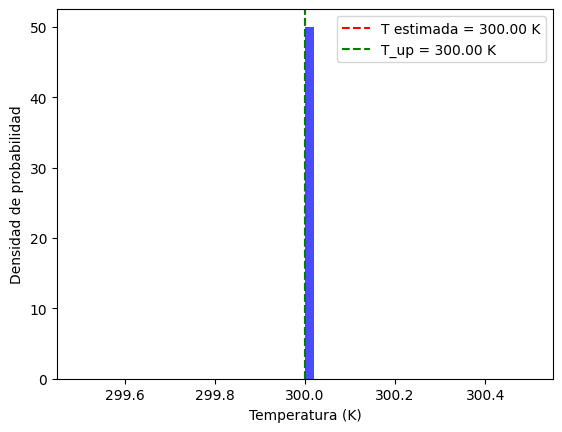

In [66]:
def metropolis_hastings(data, n_iter=20000, T_init=300, step_size=1):
    T_values = [T_init]
    current_T = T_init

    for _ in range(n_iter):
        proposed_T = current_T + np.random.uniform(-step_size, step_size)
        if proposed_T <= 0:  # Rechazar temperaturas negativas o cero
            continue

        # Calcular likelihood
        likelihood_current = np.prod(likelihood(data, current_T))
        likelihood_proposed = np.prod(likelihood(data, proposed_T))

        # Aceptar o rechazar
        acceptance_ratio = likelihood_proposed / likelihood_current
        if acceptance_ratio >= 1 or np.random.rand() < acceptance_ratio:
            current_T = proposed_T

        T_values.append(current_T)

    return np.array(T_values)

# Ejecutar Metropolis-Hastings
T_samples = metropolis_hastings(V)

# Estimar T y calcular intervalo de confianza
T_estimada = np.mean(T_samples)
percentil_95 = np.percentile(T_samples, 95)

print(f"Temperatura estimada (T): {T_estimada:.2f} K")
print(f"Valor crítico superior (T_up): {percentil_95:.2f} K")

# Graficar distribución posterior de T
plt.hist(T_samples, bins=50, density=True, alpha=0.7, color='blue')
plt.axvline(T_estimada, color='red', linestyle='--', label=f'T estimada = {T_estimada:.2f} K')
plt.axvline(percentil_95, color='green', linestyle='--', label=f'T_up = {percentil_95:.2f} K')
plt.xlabel("Temperatura (K)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.show()

100%|██████████| 10000/10000 [04:18<00:00, 38.74it/s]


T estimada: 297.84 K (IC 68%: [293.47, 302.37])


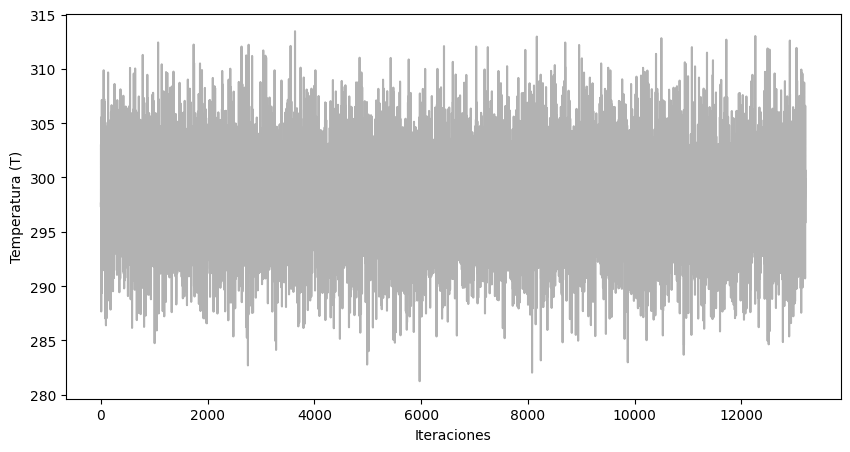

TypeError: 'Axes' object is not subscriptable

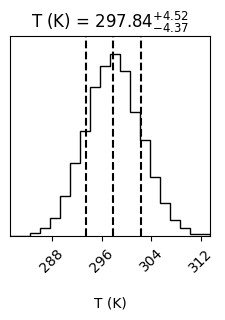

In [109]:
#(i)

# i) Algoritmo de Metropolis-Hastings con emcee para estimar la distribución posterior
!pip install emcee
!pip install corner

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee
import corner

# Cargar los datos de velocidad
V = Maxwell['Velocidad']

# Función de Prior
def LogPrior(p):
    T = p[0]
    if 0 < T < 5000:  # Rango de temperaturas plausible
        return 0.0
    return -np.inf

# Función de likelihood (ya definida en pasos anteriores)
def LogLikelihood(p, v):
    T = p[0]
    return -np.sum(np.log(likelihood(T, v)))

# Función de Posterior
def LogPosterior(p, v):
    LogP = LogPrior(p)
    if not np.isfinite(LogP):
        return -np.inf
    return LogP - LogLikelihood(p, v)  # Nota: Maximizar la posterior es minimizar la likelihood negativa

# Configurar MCMC con emcee
n_walkers = 20  # Número de walkers
n_params = 1  # Solo T como parámetro
p0 = np.random.uniform(200, 500, size=(n_walkers, n_params))  # Inicialización aleatoria de T en un rango plausible

# Inicializar el sampler
sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(V,))
sampler.run_mcmc(p0, 10000, progress=True)

# Analizar los resultados
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
truths = np.percentile(flat_samples, [16, 50, 84], axis=0)

# Access the scalar values within the 'truths' array
T_est = truths[1][0]  # Median (50th percentile)
T_lower = truths[0][0]  # 16th percentile
T_upper = truths[2][0]  # 84th percentile

print(f"T estimada: {T_est:.2f} K (IC 68%: [{T_lower:.2f}, {T_upper:.2f}])")

# Visualizar las cadenas
fig, axes = plt.subplots(1, figsize=(10, 5))
for i in range(n_params):
    axes.plot(flat_samples[:, i], "k", alpha=0.3)
axes.set_xlabel("Iteraciones")
axes.set_ylabel("Temperatura (T)")
plt.show()

# Visualizar la distribución posterior
labels = ["T (K)"]
corner.corner(flat_samples, labels=labels, truths=[truths[1]], quantiles=[0.16, 0.5, 0.84], show_titles=True)


In [110]:
# j)
T_upper = np.percentile(flat_samples, 95, axis=0)[0]
print(f"Temperaturas mayores a {T_upper:.2f} K están excluidas con un 95% de confianza.")


Temperaturas mayores a 305.38 K están excluidas con un 95% de confianza.


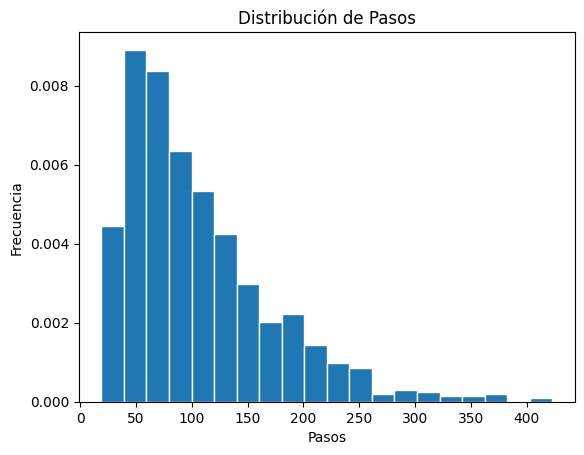

In [85]:
# Fotones

# a)
N = 1000
Rs = 1.0
l = 0.1

pasos_totales = []

for _ in range(N):
    x, y, z = 0.0, 0.0, 0.0
    pasos = 0

    while np.sqrt(x**2 + y**2 + z**2) <= Rs:
        theta = np.random.uniform(0, 2*np.pi)
        phi = np.random.uniform(0, np.pi)

        x += l * np.sin(phi) * np.cos(theta)
        y += l * np.sin(phi) * np.sin(theta)
        z += l * np.cos(phi)

        pasos += 1

    pasos_totales.append(pasos)

pasos_totales = np.array(pasos_totales)

pasos_totales

plt.hist(pasos_totales, bins=20, density=True, edgecolor='white')
plt.xlabel('Pasos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Pasos')
plt.show()

In [86]:
# b)
n = 20
min_pasos, max_pasos = pasos_totales.min(), pasos_totales.max()
clases = np.linspace(min_pasos, max_pasos, n + 1)
puntos_medios = (clases[:-1] + clases[1:]) / 2

In [87]:
# c)
frecuencias, _ = np.histogram(pasos_totales, bins=clases)
frecuencias_normalizadas = frecuencias / N
frecuencias_normalizadas

array([0.09 , 0.18 , 0.169, 0.128, 0.108, 0.086, 0.06 , 0.041, 0.045,
       0.029, 0.02 , 0.017, 0.004, 0.006, 0.005, 0.003, 0.003, 0.004,
       0.   , 0.002])

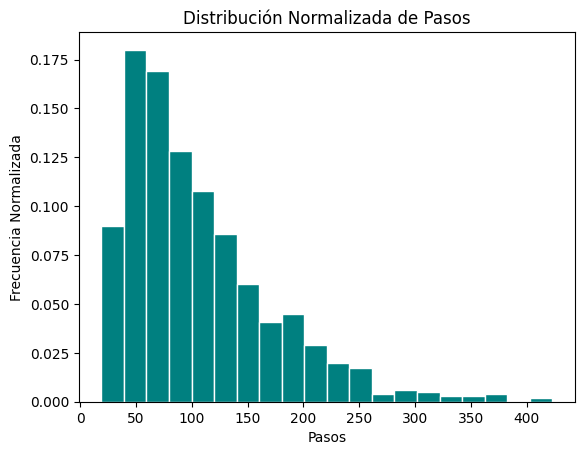

In [88]:
plt.bar(puntos_medios, frecuencias_normalizadas, width=np.diff(clases), edgecolor="white", align="center", color="teal")
plt.xlabel('Pasos')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución Normalizada de Pasos')
plt.show()

In [108]:
valor_esperado = np.sum(frecuencias_normalizadas * puntos_medios)
valor_esperado

106.14279999999998

In [90]:
Ve = np.mean(pasos_totales)
Ve

105.989

In [91]:
# f)
Valor_pasos = (Rs/l)**2
Valor_pasos

100.0

In [92]:
# g)
Lr = 0.000006
Rsr = 700000
c = 300000
T = (Rs**2)/Lr*c
T

50000000000.0

In [93]:
anios = T / (60*60*24*365)
anios

1585.4895991882292

In [99]:
# h)
from scipy.stats import exponweib
a,c,d,e = exponweib.fit(pasos_totales)
a,c,d,e

(2.0753722453241483, 0.974660812558297, 18.020058784513612, 56.51970319969983)

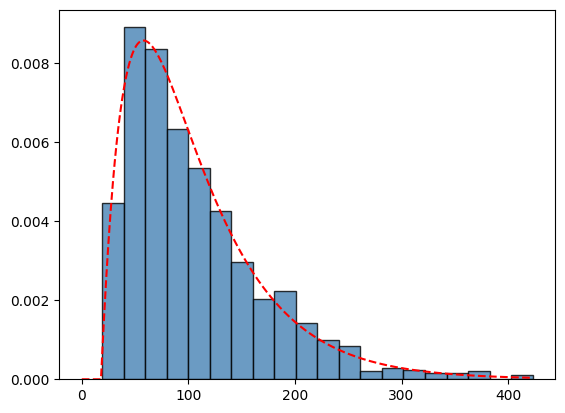

Parámetros ajustados de Weibull: a = 2.08, c = 0.97, loc = 18.02, scale = 56.52


In [106]:
x = np.linspace(0, max(pasos_totales), 1000)
pdf_fit = exponweib.pdf(x, a, c, d, e)

# Graficar la distribución ajustada
plt.plot(x, pdf_fit, linestyle='--', color='r', label='Distribución Ajustada')
plt.hist(pasos_totales, bins=20, density=True, edgecolor='k', alpha=0.8, color='steelblue')
plt.show()

# Imprimir los parámetros ajustados
print(f"Parámetros ajustados de Weibull: a = {a:.2f}, c = {c:.2f}, loc = {d:.2f}, scale = {e:.2f}")